# Clustering
Time Series Clustering is an unsupervised data mining technique for organizing data points into groups based on their similarity. The objective is to maximize data similarity within clusters and minimize it across clusters.

In [2]:
# Since pytrends is returning a DataFrame object, we need pandas:
import pandas as pd
# Import of pytrends (needs to be pip installed first):
from pytrends.request import TrendReq

pytrends = TrendReq(hl='en-US', tz=480)

In [3]:
kw_list = ['spice girls','backstreet boys','boyz ii men','destinys child','pussycat dolls']
pytrends.build_payload(kw_list=kw_list,cat=0,timeframe='2022-07-01 2022-07-30',geo='PH', gprop='')
df = pytrends.interest_over_time()
df

,spice girls,backstreet boys,boyz ii men,destinys child,pussycat dolls,isPartial
date,,,,,,
2022-07-01,17,51,0,0,9,False
2022-07-02,56,65,20,0,10,False
2022-07-03,29,10,10,0,0,False
2022-07-04,24,41,0,0,35,False
2022-07-05,16,24,0,9,26,False
2022-07-06,16,49,9,0,9,False
2022-07-07,32,16,9,0,9,False
2022-07-08,17,67,0,0,9,False
2022-07-09,28,100,10,0,10,False


# dynamic time warp - NGAYON NA!
https://dtaidistance.readthedocs.io/en/latest/index.html

In [19]:
df = df.astype(float) # let's convert values to float because dtaidistance will expect ONLY float

In [21]:
np.array([
    df['spice girls'].values,
    df['backstreet boys'].values,
    df['boyz ii men'].values,
    df['destinys child'].values,
    df['pussycat dolls'].values])

array([[ 17.,  56.,  29.,  24.,  16.,  16.,  32.,  17.,  28.,   9.,  49.,
         33.,  40.,  16.,  25.,  19.,  19.,   8.,  33.,  49.,  41.,  17.,
         56.,  48.,  35.,  18.,  18.,  18.,  18.,  40.],
       [ 51.,  65.,  10.,  41.,  24.,  49.,  16.,  67., 100.,  37.,  25.,
         25.,  26.,  45.,  59.,  31.,  32.,  17.,  49.,  41.,  65.,  42.,
         66.,  38.,  78.,  27.,  26.,  63.,  36.,  60.],
       [  0.,  20.,  10.,   0.,   0.,   9.,   9.,   0.,  10.,   0.,   0.,
          9.,   0.,   0.,   0.,   0.,  32.,   9.,   9.,   9.,   9.,   0.,
          0.,   0.,   0.,   9.,   9.,  18.,  18.,   0.],
       [  0.,   0.,   0.,   0.,   9.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,  11.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   9.,   0.,   0.,   0.,   0.],
       [  9.,  10.,   0.,  35.,  26.,   9.,   9.,   9.,  10.,  10.,   0.,
         27.,   0.,   9.,   9.,  20.,   0.,   0.,   9.,   9.,   0.,  18.,
         20.,  21.,   9.,   0., 

In [22]:
# Let's setup the set of timeseries

from dtaidistance import dtw
import numpy as np
timeseries = np.array([
    df['spice girls'].values,
    df['backstreet boys'].values,
    df['boyz ii men'].values,
    df['destinys child'].values,
    df['pussycat dolls'].values])
ds = dtw.distance_matrix_fast(timeseries)

DTAIDistance C-extension for Numpy is not available. Proceeding anyway.


In [25]:
from dtaidistance.clustering import KMeans

model = KMeans(k=4, max_it=10, max_dba_it=10, dists_options={"window": 40})
cluster_idx, performed_it = model.fit(ds, use_c=True, use_parallel=False)

DTAIDistance C-extension for Numpy is not available. Proceeding anyway.
DTAIDistance C-extension for Numpy is not available. Proceeding anyway.
DTAIDistance C-extension for Numpy is not available. Proceeding anyway.
DTAIDistance C-extension for Numpy is not available. Proceeding anyway.
  0%|                                                                                           | 0/10 [00:00<?, ?it/s]DTAIDistance C-extension for Numpy is not available. Proceeding anyway.
DTAIDistance C-extension for Numpy is not available. Proceeding anyway.
DTAIDistance C-extension for Numpy is not available. Proceeding anyway.
DTAIDistance C-extension for Numpy is not available. Proceeding anyway.
DTAIDistance C-extension for Numpy is not available. Proceeding anyway.
DTAIDistance C-extension for Numpy is not available. Proceeding anyway.
 10%|████████▏                                                                         | 1/10 [00:00<00:00, 166.66it/s]


In [26]:
# cluster indices 
cluster_idx

{0: {1}, 1: {2, 4}, 2: {0}, 3: {3}}

In [42]:
for index in cluster_idx:
    print("Cluster: ",index)
    cluster = cluster_idx[index]
    for c in cluster:
        print(c,"--",df.columns[c])

Cluster:  0
1 -- backstreet boys
Cluster:  1
2 -- boyz ii men
4 -- pussycat dolls
Cluster:  2
0 -- spice girls
Cluster:  3
3 -- destinys child


In [27]:
#number of iterations If the number of iterations is equal to max_it, the clustering did not converge.
performed_it 

3

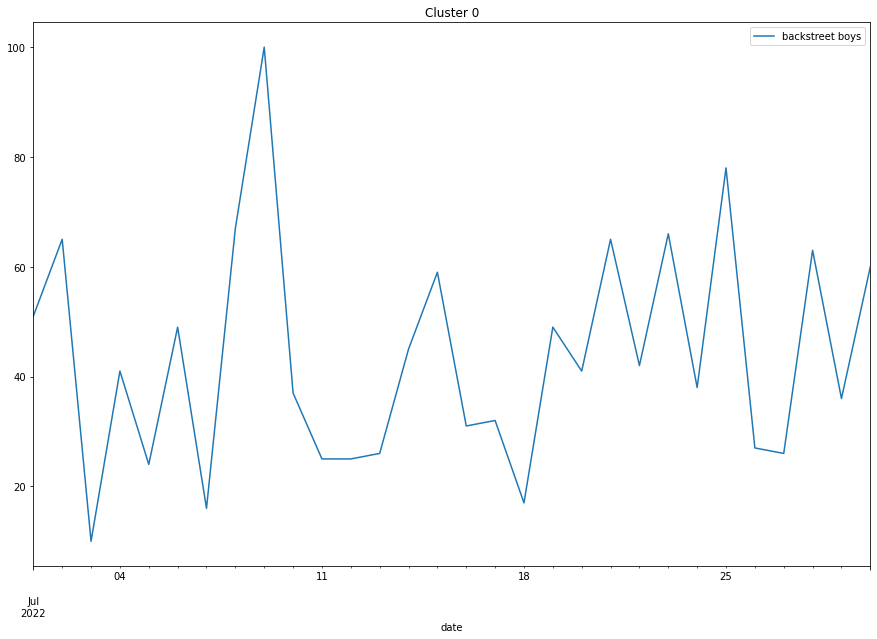

In [49]:
plt.figure(figsize=(15,10))
df['backstreet boys'].plot(title="Cluster 0")
plt.legend()

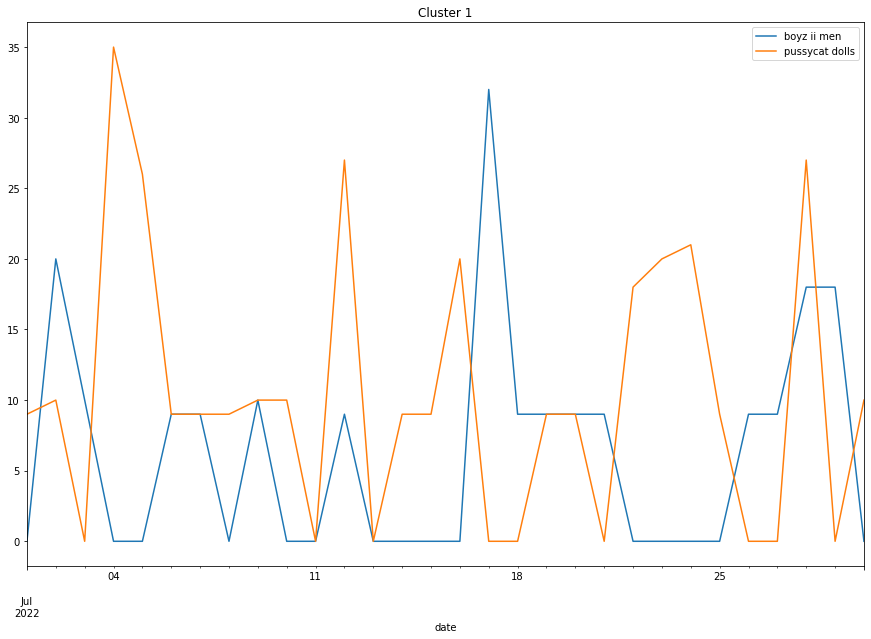

In [50]:
plt.figure(figsize=(15,10))
df['boyz ii men'].plot()
df['pussycat dolls'].plot(title="Cluster 1")

plt.legend()

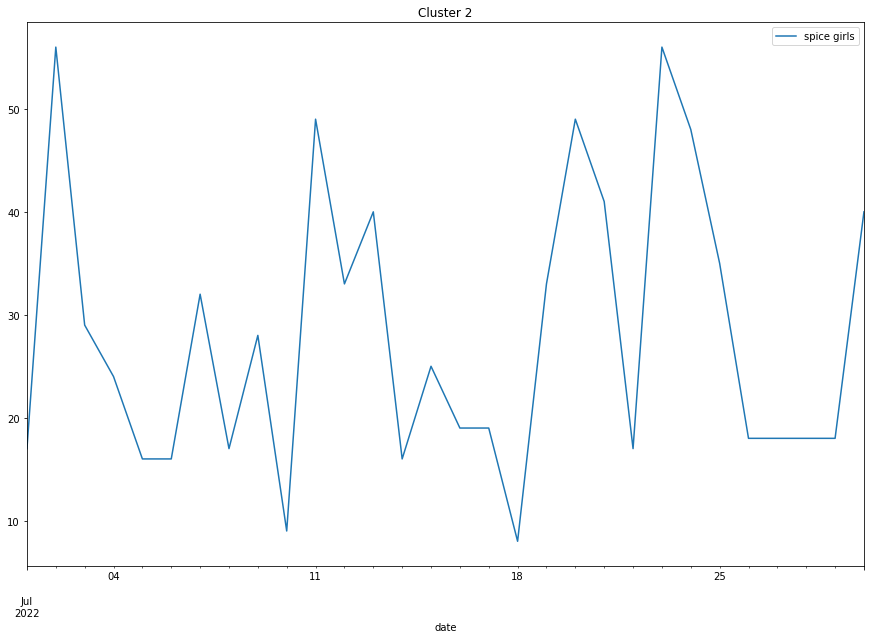

In [51]:
plt.figure(figsize=(15,10))
df['spice girls'].plot(title="Cluster 2")

plt.legend()

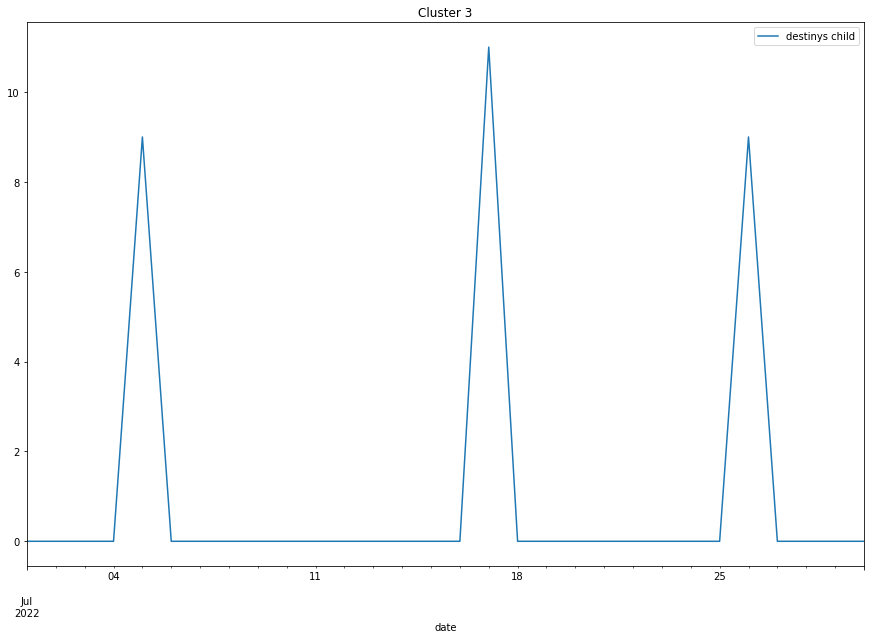

In [52]:
plt.figure(figsize=(15,10))
df['destinys child'].plot(title="Cluster 3")

plt.legend()